In [96]:
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pandas import DataFrame as df
import pandas as pd
import numpy as np
import movie_parsing
import process_data
import factorization_machine as fm
from pyfm import pylibfm

import experiemnt_fm
from sklearn.feature_extraction import DictVectorizer

links = pd.read_csv('./data/ml-latest-small/links.csv')
movies = pd.read_csv("./data/ml-latest-small/movies.csv")
ratings = pd.read_csv("./data/ml-latest-small/ratings.csv")
df_movies = pd.read_csv('./data/movie_objects.csv', encoding = 'utf-8')
df_user = pd.read_csv("./data/u.user",sep='|', 
                      names=['userId', 'age', 'gender', 'occupation', 'zip_code'], encoding = 'utf-8')[:671]

reload(process_data)
df_movies = movie_parsing.parse(df_movies)
# df_movie_features, df_user_features = process_data.process(df_movies, df_user)
# df_movie_features, df_user_features = df_movie_features.set_index('imdbId'), df_user_features.set_index('userId')
ratings = ratings.merge(links, on = 'movieId')
ratings = ratings.merge(df_movies, on ='imdbId')
ratings = ratings.merge(df_user, on = 'userId')
ratings.dropna(subset=['year'],inplace=True)

### Factorization Machine

### Same feature as linear regression

In [24]:
import math
from sklearn.feature_extraction import DictVectorizer
import tokenizer

np.random.seed(10)
P = np.random.permutation(len(ratings))
n = len(ratings)
ratings_tr = ratings.iloc[P[:int(math.floor(9*n /10.))]]
ratings_te = ratings.iloc[P[int(math.floor(9*n /10.)):]]

In [98]:
reload(tokenizer)
train_data, y_tr = tokenizer.tokenize(ratings_tr)
test_data, y_te = tokenizer.tokenize(ratings_te)

v = DictVectorizer()
X_train = v.fit_transform(train_data)
X_test = v.transform(test_data)

SyntaxError: invalid syntax (tokenizer.py, line 3)

### Example (Rating matrix only)

In [76]:
models, train_error, test_error = fm_exexperiemnt(X_train, y_tr, X_test, y_te)

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.45098
Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.45098
-- Epoch 2
Training MSE: 0.40398
-- Epoch 3
Training MSE: 0.38835
Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.45098
-- Epoch 2
Training MSE: 0.40398
-- Epoch 3
Training MSE: 0.38835
-- Epoch 4
Training MSE: 0.37934
-- Epoch 5
Training MSE: 0.37178
Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.45098
-- Epoch 2
Training MSE: 0.40398
-- Epoch 3
Training MSE: 0.38835
-- Epoch 4
Training MSE: 0.37934
-- Epoch 5
Training MSE: 0.37178
-- Epoch 6
Training MSE: 0.36413
-- Epoch 7
Training MSE: 0.35680
-- Epoch 8
Training MSE: 0.35115
-- Epoch 9
Training MSE: 0.34580
-- Epoch 10
Training MSE: 0.34079
Creating validation dataset of 0.01 of training for adaptive regular

In [ ]:
train:
[10.122115122387212,
  5.5183203487083734,
  3.2693746681842288,
  1.479252089171863,
  1.1167147295691862,
  1.1049901375544755],
test:
[9.9976532702394554,
  5.4322229950861347,
  3.2099784969218388,
  1.4562746197973817,
  1.1170159075291104,
  1.1070247488436666]

In [60]:
preds = fm.predict(X_test)
from sklearn.metrics import mean_squared_error
print("FM MSE: %.4f" % mean_squared_error(y_te, preds))

FM MSE: 1.1066


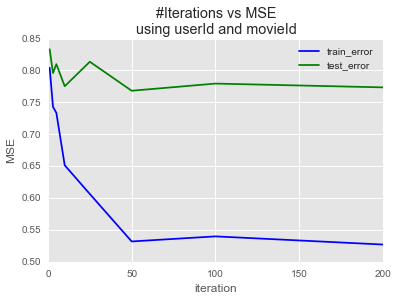

In [92]:
plt.plot([k for k, err in train_error], [err for k, err in train_error], 'b', label = 'train_error')
plt.plot([k for k, err in test_error], [err for k, err in test_error], 'g', label = 'test_error')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.title('#Iterations vs MSE \nusing userId and movieId')

In [94]:
train_error

[(1, 0.80415239742332889),
 (3, 0.74302316482015984),
 (5, 0.73354496186084361),
 (10, 0.65135789586405224),
 (25, 0.60633070305235237),
 (50, 0.53190967159826807),
 (100, 0.53985948299147823),
 (200, 0.52708637087139221)]

In [95]:
test_error

[(1, 0.83334104111770435),
 (3, 0.79596992535532884),
 (5, 0.80995835050512155),
 (10, 0.77529260724615945),
 (25, 0.81370285142791776),
 (50, 0.76821941781274417),
 (100, 0.7794633440710198),
 (200, 0.77352132039309585)]

In [ ]:
preds 

In [ ]:
df_movie_features_bkup

### References

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872